## 1. Loading required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


## 2. Mexico gourvement loading Covid 19 dataset

In [2]:
file_path = "/home/mael/Covid_19_ML_Project/c19mlp/covid_dataset/covid.csv"
file_path

'/home/mael/Covid_19_ML_Project/c19mlp/covid_dataset/covid.csv'

In [3]:
#loading of with the NA figures in the dataset
covid_death_pp = pd.read_csv(file_path,sep=',', na_values=[97,98,99])

In [4]:
covid_death_pp_df= covid_death_pp.copy()

⚠️ **During the EDA, we indentify only "date_died" feature useful for our case, to conclude we will drop the others type object features**

In [5]:
#small feature engineering required for filtering purpose
covid_death_pp_df['patient_died']=covid_death_pp_df['date_died'].map({'9999-99-99':0})
covid_death_pp_df['patient_died']=covid_death_pp_df['patient_died'].fillna(1)

In [6]:
covid_death_pp_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,patient_died
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,NaN,2.0,27.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,NaN,0.0
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,NaN,2.0,24.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,NaN,0.0
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,54.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1,2.0,0.0
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2.0,1.0,30.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,2.0,0.0
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,60.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,NaN,1,2.0,1.0


In [7]:
# filttring of the Covid 19's positive patient
covid_death_pp_df = covid_death_pp_df[covid_death_pp_df['covid_res']== 1]

In [8]:
covid_death_pp_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,patient_died
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,NaN,2.0,27.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,NaN,0.0
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,NaN,2.0,24.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,NaN,0.0
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,54.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1,2.0,0.0
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2.0,1.0,30.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,2.0,0.0
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,60.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,NaN,1,2.0,1.0


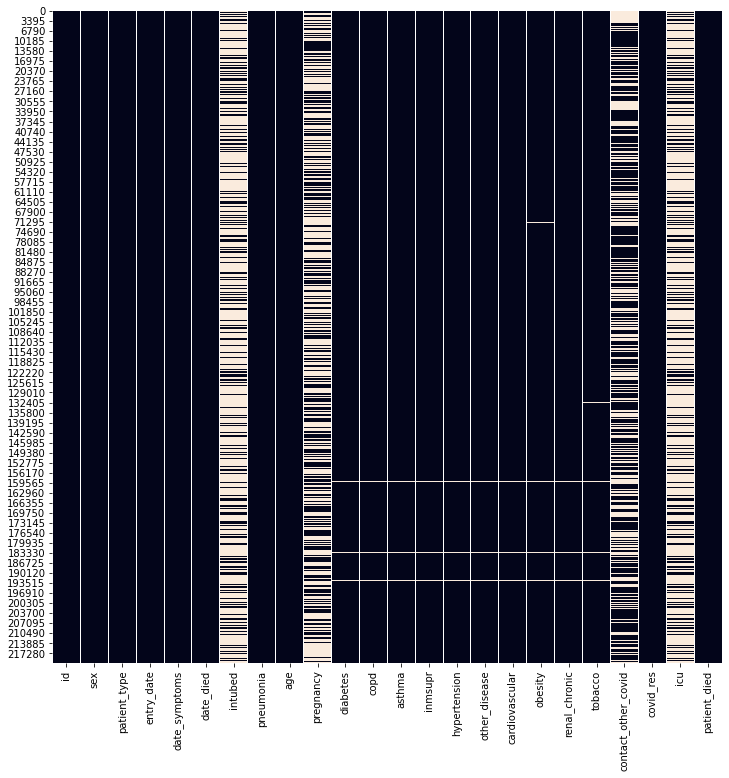

In [9]:
# dataset's NA values analysis
plt.figure(figsize=(12,12))
sns.heatmap(covid_death_pp_df.isna(), cbar=False)

In [10]:
(covid_death_pp_df.isna().sum()/covid_death_pp_df.shape[0]).sort_values(ascending=False)

icu                    0.690878
intubed                0.690873
pregnancy              0.550551
contact_other_covid    0.367199
other_disease          0.005203
inmsupr                0.003952
tobacco                0.003884
diabetes               0.003861
cardiovascular         0.003734
obesity                0.003703
hypertension           0.003626
renal_chronic          0.003607
asthma                 0.003503
copd                   0.003467
age                    0.000367
pneumonia              0.000014
id                     0.000005
covid_res              0.000000
date_died              0.000000
date_symptoms          0.000000
entry_date             0.000000
patient_type           0.000000
sex                    0.000000
patient_died           0.000000
dtype: float64

In [11]:
covid_death_pp_df.shape

(220657, 24)

In [12]:
covid_death_pp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220657 entries, 0 to 220656
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   220656 non-null  object 
 1   sex                  220657 non-null  int64  
 2   patient_type         220657 non-null  int64  
 3   entry_date           220657 non-null  object 
 4   date_symptoms        220657 non-null  object 
 5   date_died            220657 non-null  object 
 6   intubed              68211 non-null   float64
 7   pneumonia            220654 non-null  float64
 8   age                  220576 non-null  float64
 9   pregnancy            99174 non-null   float64
 10  diabetes             219805 non-null  float64
 11  copd                 219892 non-null  float64
 12  asthma               219884 non-null  float64
 13  inmsupr              219785 non-null  float64
 14  hypertension         219857 non-null  float64
 15  other_disease    

## 3.1 Pre - Processing Raw dataset "covid_death_pp_df"

**objective:** 
- perform some feature engineering/encoding/imputation to improve the efficiency feature management from the raw dataset
- perform performance analysis beteween feature engineering/model's refrence prediction   

## 3.2 TrainTest - tagets balancing check - features Engineering / Encoding / Imputing - Pre-processing

In [13]:
#import machine learning library
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report,precision_recall_curve, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import make_column_selector
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn. decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

- **Train/Test split**

In [14]:
#split of the dataset in a trainset and a testset 'size=20%' 
trainset, testset = train_test_split(covid_death_pp_df, test_size= 0.2, random_state=0)

- **Train/Test tagets balancing check**

In [15]:
trainset["patient_died"].value_counts(normalize=True)*100

0.0    87.6771
1.0    12.3229
Name: patient_died, dtype: float64

In [16]:
testset["patient_died"].value_counts(normalize=True)*100

0.0    87.836491
1.0    12.163509
Name: patient_died, dtype: float64

- **features engineering**

In [17]:
def feature_engineering (df):
    df['pregnancy']= df['pregnancy'].fillna(2)
    disease_columns= ["diabetes","copd","asthma","inmsupr",
                      "hypertension","cardiovascular","obesity","renal_chronic"]
    df["< 1 disease"] = np.sum(df[disease_columns]== 1, axis= 1)>1
    return df

- **features encoding**

In [18]:
def encoding (df):
    categorical_features =['sex','pneumonia', 'pregnancy', 'diabetes',
                           'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
                           'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
                           'covid_res', 'icu','patient_died','< 1 disease']
    df = pd.get_dummies(df, columns=categorical_features,drop_first=True)
    
    
    return df

- **features imputation**

In [19]:
def imputation(df):
    
    features_to_drop =['id','entry_date','date_symptoms','date_died']
    df = df.drop(features_to_drop,axis=1)
    print((df.isna().sum()/df.shape[0]).sort_values(ascending=False))
    df = df.dropna(axis=0)
    df = df.drop_duplicates(keep='first')
    print(df)
    return df

- **target varialble smoting** 

In [20]:
smote = SMOTE()

In [21]:
def smoting(X,y):
    print(y.value_counts(normalize=True)*100)
    print("X.shape:",X.shape,"y.shape:",y.shape)
    print("\n -------------------- \n")
    X, y =smote.fit_sample(X,y)
    print(y.value_counts(normalize=True)*100)
    print("X.shape:",X.shape,"y.shape:",y.shape)
    print("\n -------------------- \n")
    return X,y

- **Pre-processing**

In [22]:
def pre_processing (df):
    df = feature_engineering(df)
    df = encoding (df)
    df = imputation(df)
    X = df.drop("patient_died_1.0",axis =1)
    y = df["patient_died_1.0"]
    print ('befor SMOTE:', Counter(y))
    X_smote, y_smote = smoting(X,y)
    print("\n --XXXX------------------ \n")
    print ('afetr SMOTE:', Counter(y_smote))
    print("X_smote.shape:",X_smote.shape,"y_smote.shape:",y_smote.shape)
    #print("\n -------------------- \n")
    #print(pd.DataFrame(X).head())
    #print("\n -------------------- \n")
    #print(y.to_frame().head())
    return X_smote, y_smote

## 3.3 performance analysis feature engineering/ model's refrence prediction

In [23]:
model_0 = DecisionTreeClassifier(random_state=0)

In [24]:
model_1 = make_pipeline(SelectKBest(f_classif,k=19),DecisionTreeClassifier(random_state=0))

In [25]:
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif,k=19),DecisionTreeClassifier(random_state=0))

- **model metric evaluation**

In [26]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv= 4,scoring= 'f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label= 'train score')
    plt.plot(N, val_score.mean(axis=1), label= 'validation score')
    plt.legend()
    plt.savefig('covid19 death.png')

In [27]:
X_train, y_train = pre_processing(trainset)

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


intubed                    0.691545
age                        0.000363
< 1 disease_True           0.000000
patient_died_1.0           0.000000
sex_2                      0.000000
pneumonia_2.0              0.000000
pregnancy_2.0              0.000000
diabetes_2.0               0.000000
copd_2.0                   0.000000
asthma_2.0                 0.000000
inmsupr_2.0                0.000000
hypertension_2.0           0.000000
other_disease_2.0          0.000000
cardiovascular_2.0         0.000000
obesity_2.0                0.000000
renal_chronic_2.0          0.000000
tobacco_2.0                0.000000
contact_other_covid_2.0    0.000000
icu_2.0                    0.000000
patient_type               0.000000
dtype: float64
        patient_type  intubed   age  sex_2  pneumonia_2.0  pregnancy_2.0  diabetes_2.0  copd_2.0  asthma_2.0  inmsupr_2.0  hypertension_2.0  other_disease_2.0  cardiovascular_2.0  obesity_2.0  renal_chronic_2.0  tobacco_2.0  contact_other_covid_2.0  icu_2.0  patien

In [28]:
X_test, y_test = pre_processing(testset)

intubed                    0.688185
age                        0.000385
< 1 disease_True           0.000000
patient_died_1.0           0.000000
sex_2                      0.000000
pneumonia_2.0              0.000000
pregnancy_2.0              0.000000
diabetes_2.0               0.000000
copd_2.0                   0.000000
asthma_2.0                 0.000000
inmsupr_2.0                0.000000
hypertension_2.0           0.000000
other_disease_2.0          0.000000
cardiovascular_2.0         0.000000
obesity_2.0                0.000000
renal_chronic_2.0          0.000000
tobacco_2.0                0.000000
contact_other_covid_2.0    0.000000
icu_2.0                    0.000000
patient_type               0.000000
dtype: float64
        patient_type  intubed   age  sex_2  pneumonia_2.0  pregnancy_2.0  diabetes_2.0  copd_2.0  asthma_2.0  inmsupr_2.0  hypertension_2.0  other_disease_2.0  cardiovascular_2.0  obesity_2.0  renal_chronic_2.0  tobacco_2.0  contact_other_covid_2.0  icu_2.0  patien

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


[[3579 1078]
 [2860 1797]]
              precision    recall  f1-score   support

           0       0.56      0.77      0.65      4657
           1       0.63      0.39      0.48      4657

    accuracy                           0.58      9314
   macro avg       0.59      0.58      0.56      9314
weighted avg       0.59      0.58      0.56      9314



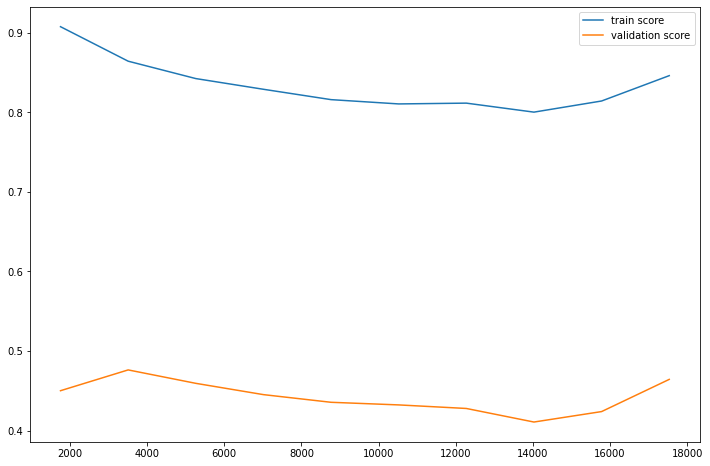

In [29]:
evaluation(model_0)

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/e

[[3579 1078]
 [2860 1797]]
              precision    recall  f1-score   support

           0       0.56      0.77      0.65      4657
           1       0.63      0.39      0.48      4657

    accuracy                           0.58      9314
   macro avg       0.59      0.58      0.56      9314
weighted avg       0.59      0.58      0.56      9314



/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/e

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/e

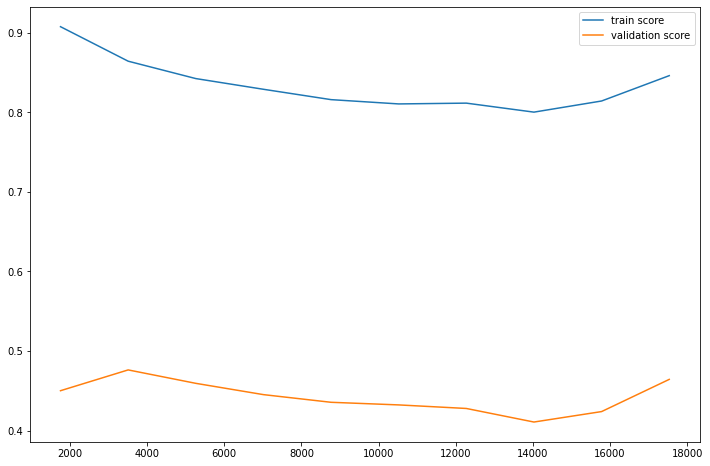

In [30]:
evaluation(model_1)

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0  1 20] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0  1 20] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0  1 20] are constant.
  UserWarning)
/home/mael/.p

[[2848 1809]
 [1544 3113]]
              precision    recall  f1-score   support

           0       0.65      0.61      0.63      4657
           1       0.63      0.67      0.65      4657

    accuracy                           0.64      9314
   macro avg       0.64      0.64      0.64      9314
weighted avg       0.64      0.64      0.64      9314



/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0  1 20] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0  1 20] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0  1 20] are constant.
  UserWarning)
/home/mael/.p

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0  1 20] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0  1 20] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0  1 20] are constant.
  UserWarning)
/home/mael/.p

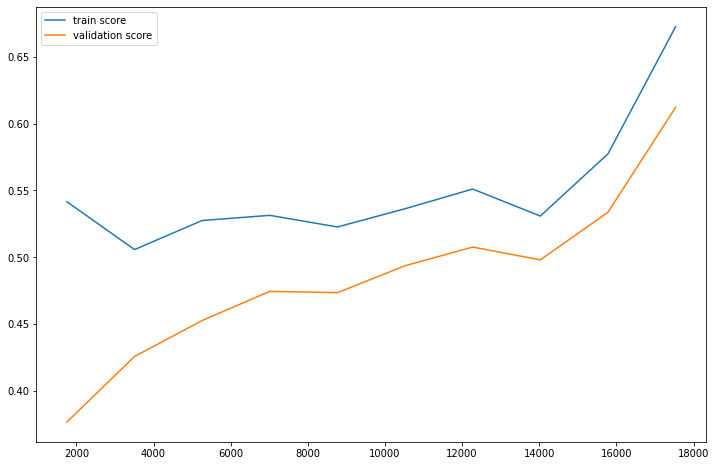

In [31]:
evaluation(model_2)

- **Model features importances**

In [32]:
pd.DataFrame(model_0.feature_importances_, index=X_train.columns)

,0
patient_type,0.000000
intubed,0.068396
age,0.402738
sex_2,0.058988
pneumonia_2.0,0.032300
pregnancy_2.0,0.003153
diabetes_2.0,0.049519
copd_2.0,0.028278
asthma_2.0,0.015216
inmsupr_2.0,0.030510


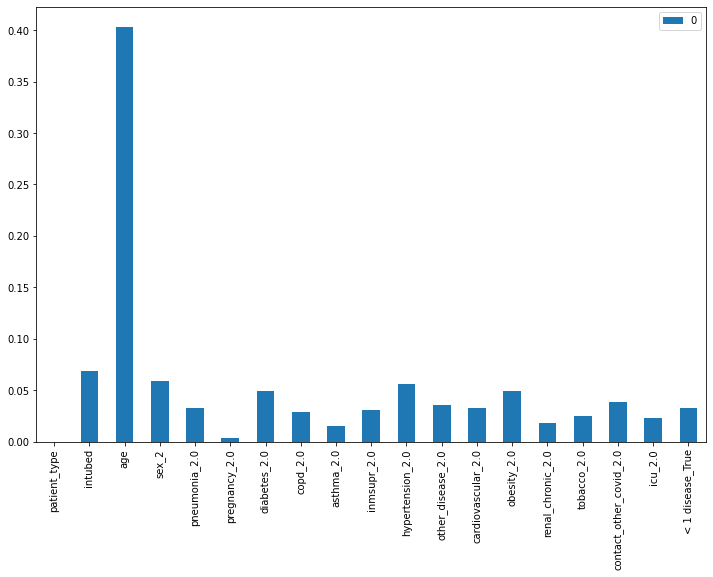

In [33]:
pd.DataFrame(model_0.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))
plt.savefig('death covid model_0 decision tree feature_importances.png')

## 4 Modelisation COVID19_ICU_DATASET "covid_icu_pp_df"

**objective:** 

- establish a stategy to select the best classification model
- modelisation hyperparameters and regularisation tunning 


- Criteria 1: dataset shape (220657, 24), X_train shpae (23382, 19), X_test shape (7886, 19)
    - the dataset is less than 100000
- Criteria 2 Parametric/Non parametric models
    - in our case, we are going to use Non parametrics model:
        - Support Vector Machines
        - Decision trees
        - Random Forest
        - K-Nearest Neighbours
- Criteria 3 Variable quatitatives/categorical
    - due to all our varibles are categorical it will probably more suitable to use Decision trees models


## 4.1 COVID19_ICU_DATASET "covid_icu_pp_df" model selection

In [34]:
# preprocessing sub-pipeline
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), 
                             SelectKBest(f_classif,k=19))

In [35]:
#models pipelines
DecisionTree = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor,StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor,StandardScaler(), KNeighborsClassifier())

In [36]:
# model dictionary
dict_of_models = {'DecisionTree':DecisionTree,
                  'RandomForest': RandomForest,
                  'AdaBoost':AdaBoost,
                  'SVM':SVM,
                  'KNN':KNN
                 }

DecisionTree
[[2848 1809]
 [1544 3113]]


/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/vers

              precision    recall  f1-score   support

           0       0.65      0.61      0.63      4657
           1       0.63      0.67      0.65      4657

    accuracy                           0.64      9314
   macro avg       0.64      0.64      0.64      9314
weighted avg       0.64      0.64      0.64      9314



/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/vers

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/vers

RandomForest


/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[2795 1862]
 [1485 3172]]
              precision    recall  f1-score   support

           0       0.65      0.60      0.63      4657
           1       0.63      0.68      0.65      4657

    accuracy                           0.64      9314
   macro avg       0.64      0.64      0.64      9314
weighted avg       0.64      0.64      0.64      9314



/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/vers

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/vers

AdaBoost


/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[2939 1718]
 [1579 3078]]
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      4657
           1       0.64      0.66      0.65      4657

    accuracy                           0.65      9314
   macro avg       0.65      0.65      0.65      9314
weighted avg       0.65      0.65      0.65      9314



/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/vers

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/vers

SVM


/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[2762 1895]
 [1432 3225]]
              precision    recall  f1-score   support

           0       0.66      0.59      0.62      4657
           1       0.63      0.69      0.66      4657

    accuracy                           0.64      9314
   macro avg       0.64      0.64      0.64      9314
weighted avg       0.64      0.64      0.64      9314



/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/vers

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/vers

KNN


/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[2987 1670]
 [2010 2647]]
              precision    recall  f1-score   support

           0       0.60      0.64      0.62      4657
           1       0.61      0.57      0.59      4657

    accuracy                           0.60      9314
   macro avg       0.61      0.60      0.60      9314
weighted avg       0.61      0.60      0.60      9314



/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/vers

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 0 19] are constant.
  UserWarning)
/home/mael/.pyenv/vers

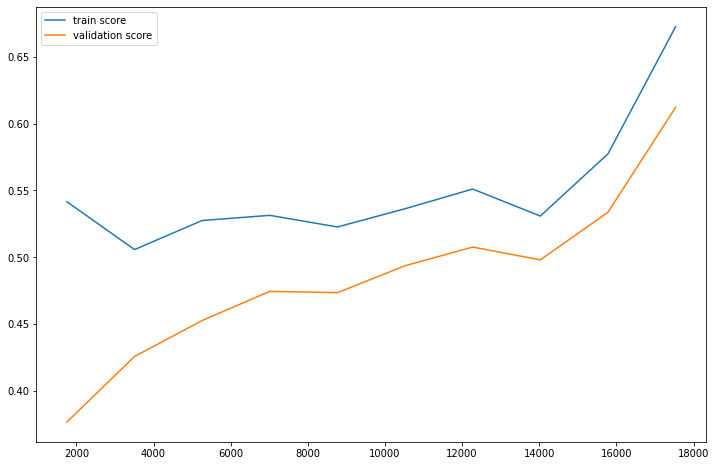

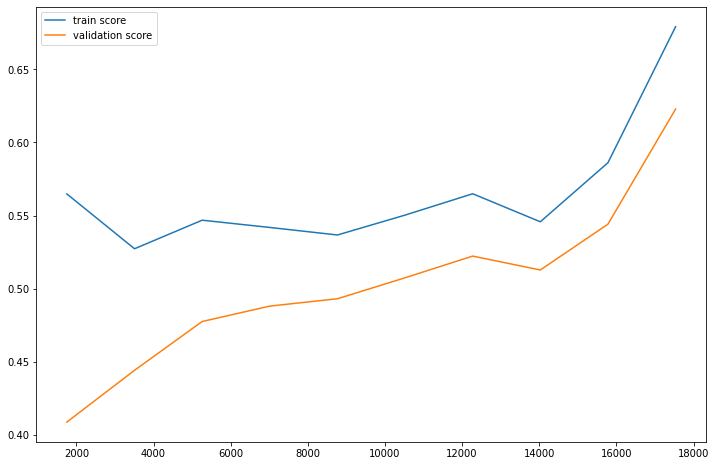

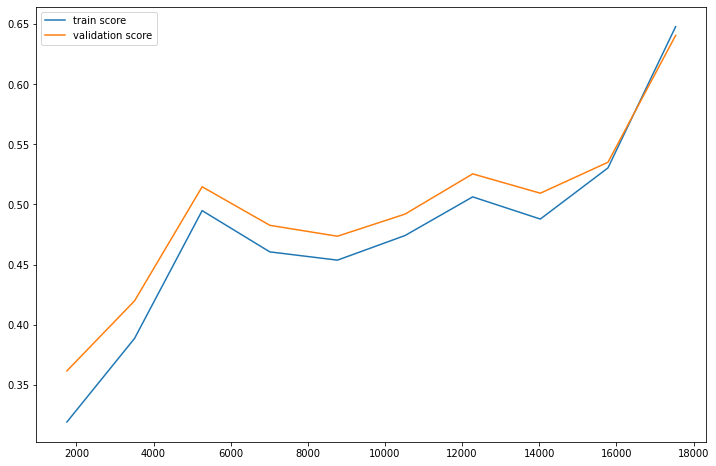

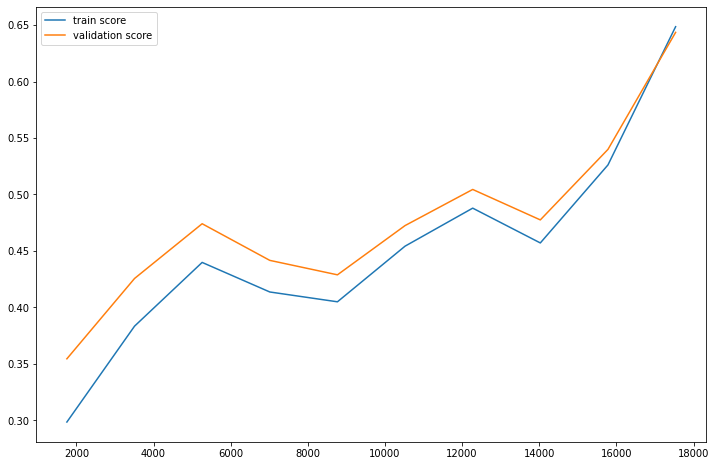

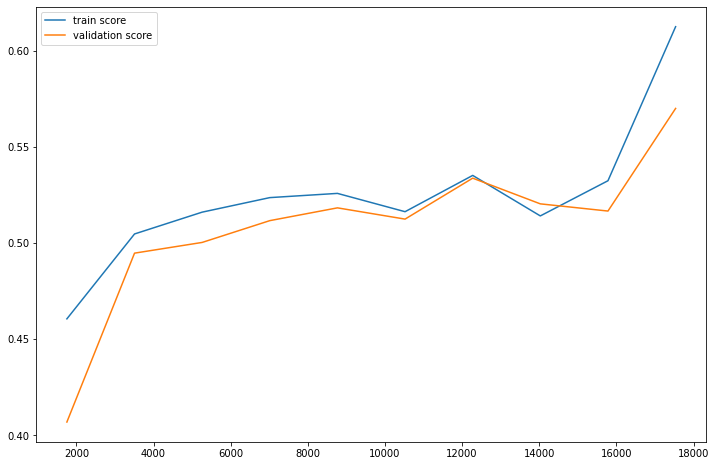

In [37]:
# models loop execution
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [38]:
# preprocessing sub-pipeline
preprocessor_2 = make_pipeline(SelectKBest(f_classif,k=19))

In [39]:
#models pipelines
DecisionTree_2 = make_pipeline(preprocessor_2,DecisionTreeClassifier(random_state=0))
RandomForest_2 = make_pipeline(preprocessor_2, RandomForestClassifier(random_state=0))
AdaBoost_2 = make_pipeline(preprocessor_2, AdaBoostClassifier(random_state=0))
SVM_2 = make_pipeline(preprocessor_2,StandardScaler(), SVC(random_state=0))
KNN_2 = make_pipeline(preprocessor_2,StandardScaler(), KNeighborsClassifier())

In [40]:
# model dictionary
dict_of_models_2 = {'DecisionTree_2':DecisionTree_2,
                  'RandomForest_2': RandomForest_2,
                  'AdaBoost_2':AdaBoost_2,
                  'SVM_2':SVM_2,
                  'KNN_2':KNN_2
                 }

In [ ]:
# models loop execution
for name, model in dict_of_models_2.items():
    print(name)
    evaluation(model)

DecisionTree_2
[[3579 1078]
 [2860 1797]]
              precision    recall  f1-score   support

           0       0.56      0.77      0.65      4657
           1       0.63      0.39      0.48      4657

    accuracy                           0.58      9314
   macro avg       0.59      0.58      0.56      9314
weighted avg       0.59      0.58      0.56      9314



/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/e

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/e

RandomForest_2


/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[2732 1925]
 [1845 2812]]
              precision    recall  f1-score   support

           0       0.60      0.59      0.59      4657
           1       0.59      0.60      0.60      4657

    accuracy                           0.60      9314
   macro avg       0.60      0.60      0.60      9314
weighted avg       0.60      0.60      0.60      9314



/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/e

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/e

AdaBoost_2


/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[3034 1623]
 [1557 3100]]
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      4657
           1       0.66      0.67      0.66      4657

    accuracy                           0.66      9314
   macro avg       0.66      0.66      0.66      9314
weighted avg       0.66      0.66      0.66      9314



/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/e

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/e

SVM_2


/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[2732 1925]
 [1316 3341]]
              precision    recall  f1-score   support

           0       0.67      0.59      0.63      4657
           1       0.63      0.72      0.67      4657

    accuracy                           0.65      9314
   macro avg       0.65      0.65      0.65      9314
weighted avg       0.65      0.65      0.65      9314



/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/e

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/e

KNN_2


/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[2847 1810]
 [1886 2771]]
              precision    recall  f1-score   support

           0       0.60      0.61      0.61      4657
           1       0.60      0.60      0.60      4657

    accuracy                           0.60      9314
   macro avg       0.60      0.60      0.60      9314
weighted avg       0.60      0.60      0.60      9314



/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/e

## 4.2 COVID19_ICU_DATASET "covid_icu_pp_df" model hyperparameters and regularisation tunning

In [ ]:
hyper_params_DecisionTree_2 = {'decisiontreeclassifier__criterion':["gini", "entropy"],
                'decisiontreeclassifier__max_depth':[1,2,3,4,5,6,7,None],
                'decisiontreeclassifier__min_samples_leaf':np.arange(1, 9, 1),
                'pipeline__polynomialfeatures__degree':np.arange(1, 4, 1),
                'pipeline__selectkbest__k':np.arange(2, 19, 1)}

In [ ]:
grid = RandomizedSearchCV(DecisionTree, hyper_params_DecisionTree_2, scoring='recall', cv=5, n_iter=100)
grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
evaluation(grid.best_estimator_)

In [ ]:
precision, recall, thresold =precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test)) 

In [ ]:
plt.plot(thresold, precision[:-1], label= 'precision')
plt.plot(thresold, precision[:-1], label= 'recall')
plt.legend()

In [ ]:
def model_final(model, X, thresold=0):
    return model.decision_function(X)> thresold

In [ ]:
y_pred = model_final(grid.best_estimator_, X_test, thresold=0.02)

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
recall_score(y_test,y_pred)

## 5 Conclusion modelisation COVID19_ICU_DATASET "covid_icu_pp_df"

**objective:** 

Metrics targeted:
- F1 => 50%<br>
- Recall => 70%<br>

we reach our taget modelisation on "patient_died_1.0" => 1 with the decision tree estimator